In [1]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline # for using the models


In [2]:
# Environmental model.
name = "ESGBERT/EnvironmentalBERT-environmental" # path to download from HuggingFace
# In simple words, the tokenizer prepares the text for the model and the model classifies the text-
tokenizer = AutoTokenizer.from_pretrained(name)
model = AutoModelForSequenceClassification.from_pretrained(name)
# The pipeline combines tokenizer and model to one process.
pipe_env = pipeline("text-classification", model=model, tokenizer=tokenizer)

# Also load the social and governance model.
# Social model.
name = "ESGBERT/SocialBERT-social"
tokenizer = AutoTokenizer.from_pretrained(name)
model = AutoModelForSequenceClassification.from_pretrained(name)
pipe_soc = pipeline("text-classification", model=model, tokenizer=tokenizer)

# Governance model.
name = "ESGBERT/GovernanceBERT-governance"
tokenizer = AutoTokenizer.from_pretrained(name)
model = AutoModelForSequenceClassification.from_pretrained(name)
pipe_gov = pipeline("text-classification", model=model, tokenizer=tokenizer)


In [3]:
# You can input single sentences or arrays of sentences into the pipeline.
sentences_test = ["Besides financial considerations, we also consider harms to the biodiversity and broader ecosystem impacts.",
                  "Tokenization is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning."]
test = pipe_env(sentences_test)
print(test)
# [{'label': 'environmental', 'score': 0.994878888130188},
#  {'label': 'none', 'score': 0.997612714767456}]

[{'label': 'environmental', 'score': 0.994878888130188}, {'label': 'none', 'score': 0.997612714767456}]


In [4]:
!pip install tika
import tika
from tika import parser

# We use the Barclays annual report to analyse in this example.
path = "https://home.barclays/content/dam/home-barclays/documents/citizenship/ESG/2024/2023%20Barclays%20ESG%20Reporting%20Framework.pdf"

# The from_file() function of tika helps us to load the content of the document. 
# (takes ca. 30 sec)
report = parser.from_file(path)

print(report["content"])

2024-08-24 16:57:19,022 [MainThread  ] [INFO ]  Retrieving https://home.barclays/content/dam/home-barclays/documents/citizenship/ESG/2024/2023%20Barclays%20ESG%20Reporting%20Framework.pdf to /var/folders/m4/py2v9t557sn5pwgbcr52g5g40000gn/T/content-dam-home-barclays-documents-citizenship-esg-2024-2023-20barclays-20esg-20reporting-20framework.pdf.










































2023 Barclays ESG Reporting Framework




Approach 2

Global Reporting Initiative (GRI) 2

Sustainability Accounting Standards Board (SASB) 2

UN Principles for Responsible Banking (PRB) 2

Assurance 5

Select ESG metrics and definitions 5

• Net Zero Ambition 5

• Capital And Products 6

• Skills and Employability 9

• Achieving Net Zero Operations 10

• Sustainable Innovation 14

• HR 15

Disclaimer 17

Approach

Select ESG metrics and definitions

Barclays PLC
ESG Reporting Framework 01Assurance

Net Zero 
Ambition

Capital and 
Products

Skills and 
Employability

Achieving Net 
Zero Operations

Sustainable 
Innovation HR Disclaimer

Contents



This document sets out Barclays’ Environmental, Social, Governance (ESG) Reporting Framework 
(Framework)  including the definitions and measurement methodology for key performance 
metrics in the Barclays PLC Annual Report 2023.

To ensure the integrity of our key performance data we continue to oper

In [5]:
import spacy

# For this, we use the nlp() function from spacy. (takes 20 secs)
nlp = spacy.load('en_core_web_sm')
about_doc = nlp(report["content"])

# We transfer the sequences ("about_doc.sents") to a list of raw strings.
sequences = list(map(str, about_doc.sents))
# Look at the first 10 text sequences.
print(sequences[:10])

# ['\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nre\np\n\no\nrt\n\nCombined Annual and \nSustainability Report\n\n2022\n\n\n\n2 Audi Report 2022\n\nProducts & \nServices\n\nValue Creation & \nProduction\n\nOperations &\nIntegrity\n\nStrategy\nEmployees & \nSociety\n\nIntroduction Appendix\n\nWithout a question: 2022 was a challenging year.',
#  'A \nyear shaped by a difficult situation in the global econ-\nomy, sharply rising energy prices and continued supply \nshortages.',
# ...]

['\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n2023 Barclays ESG Reporting Framework\n\n\n\n\nApproach 2\n\nGlobal Reporting Initiative (GRI) 2\n\nSustainability Accounting Standards Board (SASB) 2\n\nUN Principles for Responsible Banking (PRB) 2\n\nAssurance 5\n\nSelect ESG metrics and definitions 5\n\n• Net Zero Ambition 5\n\n• Capital And Products 6\n\n• Skills and Employability 9\n\n• Achieving Net Zero Operations 10\n\n• Sustainable Innovation 14\n\n• HR 15\n\nDisclaimer 17\n\nApproach\n\nSelect ESG metrics and definitions\n\nBarclays PLC\nESG Reporting Framework 01Assurance\n\nNet Zero \nAmbition\n\nCapital and \nProducts\n\nSkills and \nEmployability\n\nAchieving Net \nZero Operations\n\nSustainable \nInnovation HR Disclaimer\n\nContents\n\n\n\nThis document sets out Barclays’ Environmental, Social, Governance (ESG) Reporting Framework \n(Framework)  including the definitions and measurement methodology for key performance \nmetrics in the Barc

In [6]:
# "\n" signals a new line. We remove this so that the output looks better.
sentences = [x.replace("\n", "") for x in sequences]

# Remove all empty text, i.e. if the value is "", i.e are empty.
sentences = [x for x in sentences if x != ""]

# A sentence should start with upper case.
sentences = [x for x in sentences if x[0].isupper()]

print(sentences[:10])

# ['A year shaped by a difficult situation in the global econ-omy, sharply rising energy prices and continued supply shortages.',
# ...]

['To ensure the integrity of our key performance data we continue to operate internal controls and maintain a clear audit trail supported by internal and independent external assurance processes. ', 'Reporting on non-financial metrics does not yet have the same rigour and standardised definitions that apply to financial reporting.', 'We are keen to enhance our approach to measuring performance and adopt more innovative ways to measure the wider outcomes and impacts of our activity. ', 'However, we also need to strike a balance between innovative metrics and the ability to credibly gather and verify data.', 'We publish this Framework, as it sets out definitions and assumptions for our key metrics, and outlines data collection and verification processes.', 'We continue to review and develop our approach to data, models and methodologies in line with market principles and standards as this subject area matures.', 'We are seeking to improve our reporting processes and will publish an updat

In [7]:
# Classify subset of sentences.
# The padding and trunctuation parameters help us with classifying texts of different length.
sub_sentences = sentences[:100] # takes around 20 seconds
# full sentences take around 5mins WITHOUT GPU (see next tutorial for speed ups)
env = pipe_env(sub_sentences, padding=True, truncation=True)

# You might only want the labels.
env_labels = [x["label"] for x in env]

In [8]:
import pandas as pd

# Let's look at the results. We use a dataframe for this purpose.
data_env = pd.DataFrame({"sentence": sub_sentences, "environmental": env_labels})
# Which sentences are labeled as environmental?
data_env[data_env["environmental"] == "environmental"]

,sentence,environmental
2,We are keen to enhance our approach to measuri...,environmental
7,Global Reporting Initiative (GRI),environmental
8,Our 2023 ESG disclosures have been prepared wi...,environmental
10,Sustainability Accounting Standards Board (SAS...,environmental
11,Our 2023 ESG disclosures set out our progress ...,environmental
12,"Further details on GRI, SASB, PRB can be found...",environmental
15,Refer to Barclays’ present and past limited in...,environmental
20,STEP 2 – TARGET SETTINGBarclays has previously...,environmental
22,Climate stabilityWe are committed to aligning ...,environmental
23,Our approach to reducing our financed emission...,environmental


               sentence
environmental          
environmental        58
none                 42


<Axes: xlabel='environmental'>

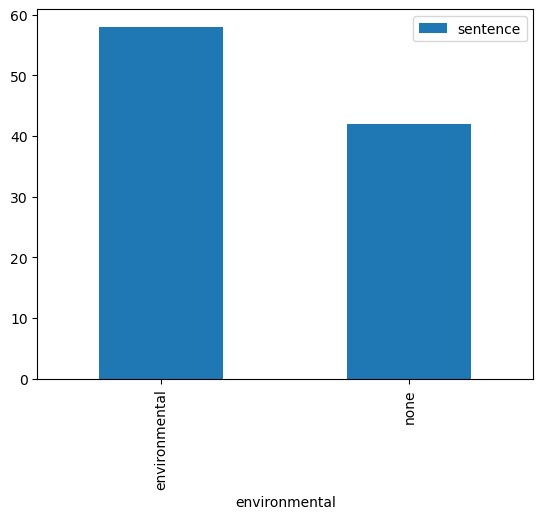

In [9]:
# It could also be interesting to look at the proporation of environmental sentences.
print(data_env.groupby("environmental").count())
data_env.groupby("environmental").count().plot(kind="bar")

In [10]:
# To load the model, we use the exact same steps as above.
model_name = "climatebert/distilroberta-base-climate-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name, max_len=512)
pipe_sent = pipeline("text-classification", model=model, tokenizer=tokenizer)

In [13]:
# Use the model on the dataset.
sentiment = pipe_sent(sub_sentences, padding=True, truncation=True)
# Add the sentiment to the DataFrame.
data_env["sentiment"] = [x["label"] for x in sentiment]

In [14]:
# Again, have a look at the outcome.
data_env[data_env["environmental"] == "environmental"]


,sentence,environmental,sentiment
2,We are keen to enhance our approach to measuri...,environmental,neutral
7,Global Reporting Initiative (GRI),environmental,neutral
8,Our 2023 ESG disclosures have been prepared wi...,environmental,neutral
10,Sustainability Accounting Standards Board (SAS...,environmental,neutral
11,Our 2023 ESG disclosures set out our progress ...,environmental,neutral
12,"Further details on GRI, SASB, PRB can be found...",environmental,neutral
15,Refer to Barclays’ present and past limited in...,environmental,neutral
20,STEP 2 – TARGET SETTINGBarclays has previously...,environmental,neutral
22,Climate stabilityWe are committed to aligning ...,environmental,neutral
23,Our approach to reducing our financed emission...,environmental,neutral


sentiment
neutral        44
opportunity    14
Name: environmental, dtype: int64


<Axes: xlabel='sentiment'>

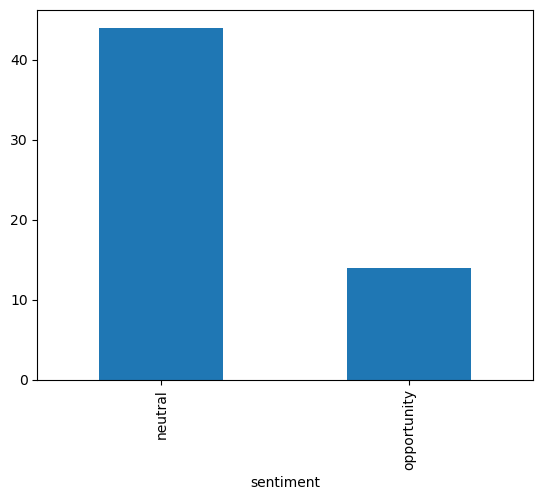

In [15]:
print(data_env[data_env["environmental"] == "environmental"].groupby("sentiment").count()["environmental"])
data_env[data_env["environmental"] == "environmental"].groupby("sentiment").count()["environmental"].plot(kind = "bar")

